In [73]:
using Plots
using AdvConvex.HW3
using AdvConvex.HW4
using Optim
using LinearAlgebra
# NOTE: nbconvert doesn't render convenient unicode stuff like lambdas and nablas

In [74]:
mat = get_spam_data()
X_train, Y_train, X_test, Y_test = train_test_split(mat, 0.334);

In [90]:
f = LogRegProblem(X_train,Y_train)
∇f(x) = HW3.∇(f,x)
prob = DifferentiableProblem(f, ∇f)
solver = GradientDescentSolver(
    α = 1e-4,
    ϵ = 0.0,
    max_iter=5_000,
    linesearch = BackTrackingLineSearch()
)
w_opt1, hist1 = solve(solver, prob, zeros(size(X_train, 1)));

In [91]:
λ = 5.0
l = PenaltyLogRegProblem(f, λ)

g(l::PenaltyLogRegProblem,w) = l.logreg(w)
∇g(l,w) = HW3.∇(l.logreg, w)
h(l::PenaltyLogRegProblem,w) = l.λ * norm(w, 1)
loss(l::PenaltyLogRegProblem, w) = g(l,w) + h(l,w)
prox_th(l::PenaltyLogRegProblem, t, y) = sign(y)*max(abs(y) - t*l.λ, 0.0)

p = ProximalProblem(
    w -> loss(l, w),
    w -> ∇g(l, w),
    (y,t) -> HW4.prox_th(l,t,y)
)

w0 = zeros(size(X_test, 1))
solver = GradientDescentSolver(
    α = 1e-4,
    ϵ = 0.0,
    max_iter=5_000,
    linesearch = BackTrackingLineSearch()
)

w_opt2, hist2 = HW4.solve(solver, p, zeros(size(X_train, 1)));

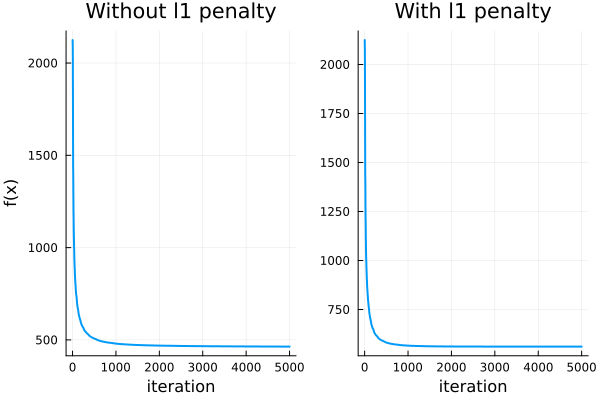

In [92]:
plot(
    plot(hist1.f, label="",lw=2,ylabel="f(x)",xlabel="iteration", title="Without l1 penalty"), 
    plot(hist2.f,label="",lw=2,xlabel="iteration", title="With l1 penalty")
)

In [94]:
test_acc1 = map(hist1.x) do x
    HW3.accuracy(x, X_test, Y_test)
end

test_acc2 = map(hist2.x) do x
    HW3.accuracy(x, X_test, Y_test)
end

train_acc1 = map(hist1.x) do x
    HW3.accuracy(x, X_train, Y_train)
end

train_acc2 = map(hist2.x) do x
    HW3.accuracy(x, X_train, Y_train)
end;

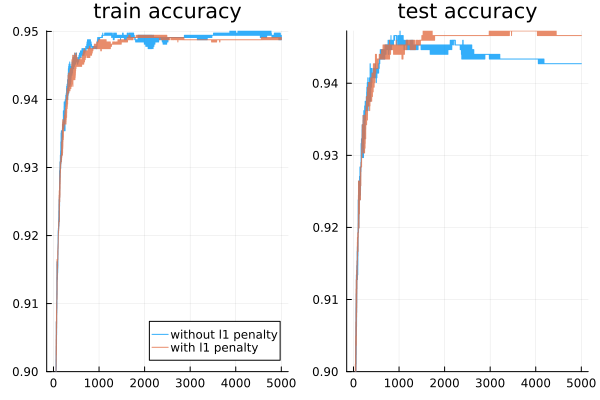

In [96]:
p1 = plot(train_acc1, ylim=(0.9, Inf), title="train accuracy", label="without l1 penalty", alpha=0.8)
plot!(p1, train_acc2, label="with l1 penalty", alpha=0.8)

p2 = plot(test_acc1, ylim=(0.9, Inf), title="test accuracy", label="", alpha=0.8)
plot!(p2, test_acc2, label="", alpha=0.8)

plot(p1, p2)